In [13]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

import sys 
import os
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f


In [14]:
df_formateado=pd.read_pickle("../datos/red_piso/Datos_filtrados/datos_pisos_filtrados.pkl")

## **Segmentamos los datos**

In [15]:
# creo una nueva columna con las categorías
df_formateado["categoria"] = df_formateado["metrosvi"].apply(f.obtener_categoria)

In [16]:
df_formateado.sample(7)

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria
2283,No,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Entre 46 y 60 m2,1,2,117900,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas medianas
489,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Entre 76 y 90 m2,1,3,220000,No tiene garaje,De 1951 a 1960,No es accesible,Desconocido,Viviendas medianas
885,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,No tiene calefacción,Entre 76 y 90 m2,1,3,176900,No tiene garaje,Desconocido,Es accesible,levemente mejorable,Viviendas medianas
1038,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Entre 31 y 45 m2,1,2,240000,No tiene garaje,De 1921 a 1940,No es accesible,levemente mejorable,Viviendas pequeñas
3661,Si,Toledo,Castilla-La Mancha,4500,IBI y ICIO,5.78,No,No tiene calefacción,Entre 91 y 105 m2,2,3,159000,No tiene garaje,De 1971 a 1980,No es accesible,casi perfecto,Viviendas amplias
2834,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Entre 91 y 105 m2,2,3,239000,1,De 1981 a 1990,No es accesible,casi perfecto,Viviendas amplias
1935,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Más de 180 m2,2,4,310000,2,Posterior a 2010,Es accesible,casi perfecto,Viviendas grandes


In [17]:
df_formateado["categoria"].value_counts()

categoria
Viviendas medianas    1916
Viviendas amplias     1262
Viviendas grandes      530
Viviendas pequeñas     177
Name: count, dtype: int64

In [18]:
df_pequeñas=df_formateado[df_formateado["categoria"]== "Viviendas pequeñas"]
df_medianas=df_formateado[df_formateado["categoria"]== "Viviendas medianas"]
df_amplias=df_formateado[df_formateado["categoria"]== "Viviendas amplias"]
df_grandes=df_formateado[df_formateado["categoria"]== "Viviendas grandes"]

In [19]:
df_pequeñas.to_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_pequeñas.csv")
df_medianas.to_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_medianas.csv")
df_amplias.to_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_amplias.csv")
df_grandes.to_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_grandes.csv")

**ASEGURAMOS QUE SE HAN CLASIFICADO CORRECTAMENTE**

In [20]:
df_pequeñas["metrosvi"].unique()

array(['Entre 31 y 45 m2', 'Hasta 30 m2'], dtype=object)

In [21]:
df_medianas["metrosvi"].unique()

array(['Entre 46 y 60 m2', 'Entre 61 y 75 m2', 'Entre 76 y 90 m2'],
      dtype=object)

In [22]:
df_amplias["metrosvi"].unique()

array(['Entre 121 y 150 m2', 'Entre 91 y 105 m2', 'Entre 106 y 120 m2'],
      dtype=object)

In [23]:
df_grandes["metrosvi"].unique()

array(['Más de 180 m2', 'Entre 151 y 180 m2'], dtype=object)

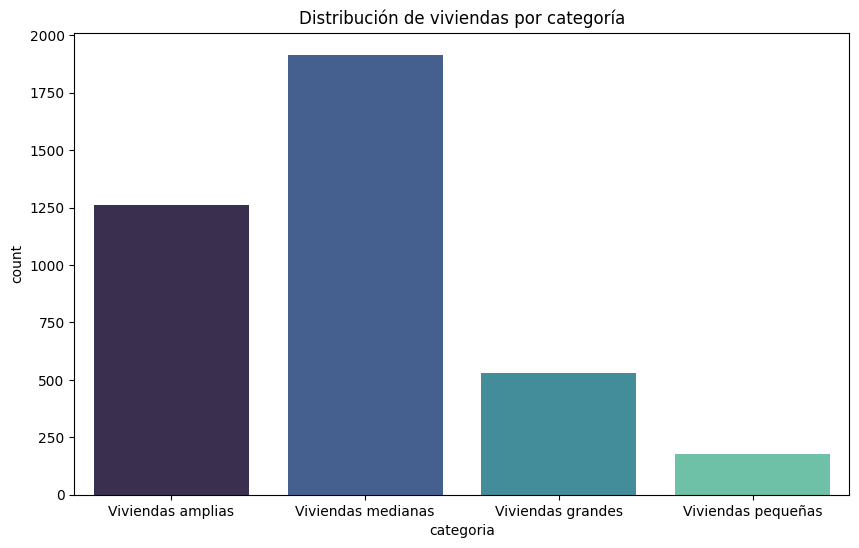

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x="categoria", data=df_formateado, palette="mako")
plt.title("Distribución de viviendas por categoría")
plt.show();